#Modelling the Spread of Infectious Diseases

##The SIR Model

#####The following is the code we used to create our simple SIR model graph. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.integrate as odeint


In [ ]:
def model(y, t , beta, gamma, mu, pi):
  S, I, R = y


  dsdt = pi - (beta*I*S) - mu*S
  didt = beta*I*S - gamma*I - mu*I
  drdt = gamma*I - mu*R

  return np.array([dsdt, didt, drdt])

In [ ]:

#initial conditions

S0 = 0.95
I0 = 0.05
R0 = 0


beta = 0.2
gamma = 0.05
mu = 0.0005
pi = 0.0005

#time (days)
t = np.linspace(0, 120, 10000)


#the array of solutions
solution = scipy.integrate.odeint(model, [S0, I0, R0], t, args=(beta, gamma, mu, pi))
solution = np.array(solution)


In [ ]:
model([S0, I0, R0], t , beta, gamma).shape

(3,)

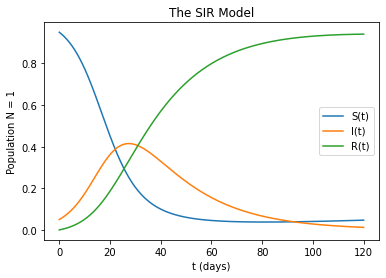

In [ ]:
#plotting the results

plt.figure()
plt.plot(t, solution[:, 0], label="S(t)")
plt.plot(t, solution[:, 1], label="I(t)")
plt.plot(t, solution[:, 2], label="R(t)")

plt.xlabel("t (days)")
plt.ylabel("Population N = 1")
plt.title('The SIR Model')
plt.legend()
plt.show()

In [ ]:
idx_max = np.argmax(solution[:, 1])
max_day = t[idx_max]
print('The epidemic peaked on day {} where {}% of the population was infected.'.format(max_day, np.max(solution[:, 1])))


idx_end = np.where(solution[:, 1] < 0.05)[0][0]
ended = t[idx_end]
print('The epidemic ended on day ', ended)


The epidemic peaked on day 27.398739873987395 where 0.415006541037709% of the population was infected.
The epidemic ended on day  86.62466246624662


##Epidemic Length Analysis

#####The following code was used to investigate the effect that $\beta$ and $\gamma$ had on the length of an epidemic. Finding the length of an epidemic modelled by the SIR model is not analytically possible so we have to use numerical methods to gain more of an insight.

In [ ]:

#this is the function we use to get our I values which we will then use to find the end point of the epidemic
def func(beta, gamma): 
  S0 = 0.95
  I0 = 0.05
  R0 = 0

  t = np.linspace(0, 400, 10000)

  solution = scipy.integrate.odeint(model, [S0, I0, R0], t, args=(beta, gamma))
  solution = np.array(solution)

  return solution[:, 1]


#time (days)
t = np.linspace(0, 400, 10000) 



b_arrays = [] #the function loops through beta values and each time stores them in there
g_arrays = [] #same with gammas^^
end_arrays = [] #this is an array of arrays. each array in the array is a range of end values for one value of gamma against a range of beta values in [0,1]

idx = 0 #the index where I reaches I0 again




def beta_arrays(g): #this funtion takes in one value of gamma at a time
  end_values_b = [] #emptying arrays
  beta_ = []
  gamma_ = []
  R_0 = []
  idx = 0
  for b in np.arange(0, 1, 0.01):         #looping though beta values in the range
    I_values = func(b, g)                 #this is an array of I values for these gamma and beta values. these are different everytime
    #if len(np.where(I_values < I0)) != 0: #checking this isn't empty
    if len(np.where(I_values < I0)[0]) != 0:   #checking this also isnt empty
      idx = np.where(I_values < I0)[0][0]      #this is the index where the end of the epidemic is 
      end = t[idx]                             #using the index to find the days on which the epidemic ended
      
      end_values_b.append(end)                 #adding the end of the epidemic to an array that stores one end value for each iteration
      beta_.append(b)                          #adding the corrosponding beta value to an array
      gamma_.append(g)                         #adding the corrosponding gamma value to an array



  return np.array(beta_), np.array(end_values_b), np.array(gamma_) 





gammas = np.arange(0, 1, 0.01) 
for g in gammas:                     #looping through gamma values
  b_a = beta_arrays(g)               #solving the ode for this gamma value
  
  b_arrays.append(b_a[0])            #adding each array that the function created to new arrays, one for end values, beta and gamma
  end_arrays.append(b_a[1])          #these arrays are what we are plotting later
  g_arrays.append(b_a[2])




100


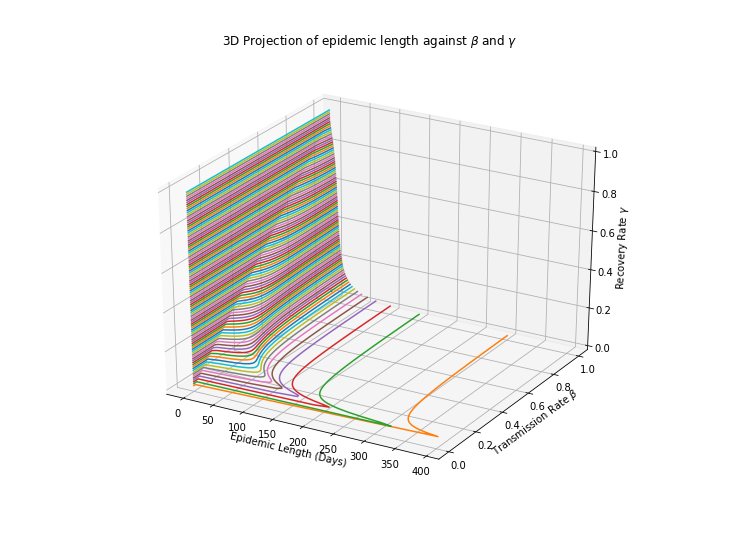

In [ ]:
#plotting the results
fig = plt.figure(figsize=(13,10))
ax = plt.axes(projection='3d')

print(len(end_arrays))

for i in range(0, 100):

    zline = end_arrays[i]
    xline = b_arrays[i]
    yline = g_arrays[i]

    ax.plot3D(zline, xline, yline)



plt.xlabel("Epidemic Length (Days)")
plt.ylabel(r'Transmission Rate $\beta$')
ax.set_zlabel(r'Recovery Rate $\gamma$')
plt.title(r'3D Projection of epidemic length against $\beta$ and $\gamma$')
ax.dist = 13

ax.plot3D(xline, yline, zline, 'tab:blue')

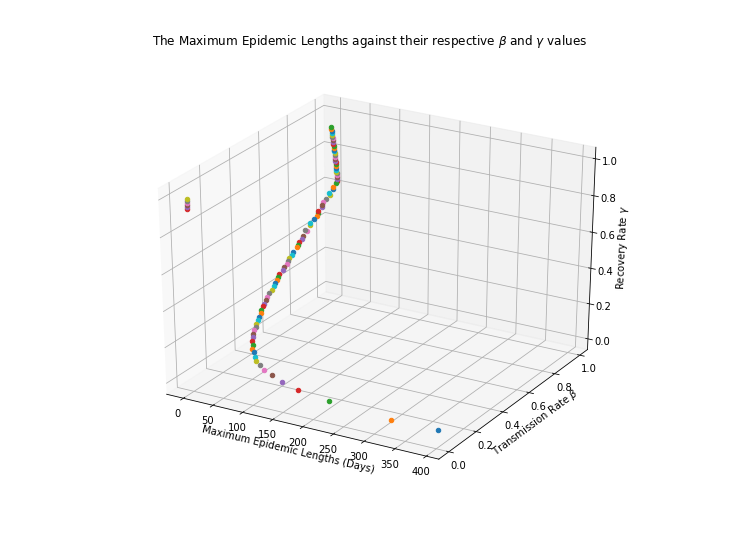

In [ ]:
#plotting the results
fig = plt.figure(figsize=(13,10))
ax = plt.axes(projection='3d')


for i in range(1, 100):

    idx = np.argmax(end_arrays[i])


    zline = end_arrays[i][idx]
    xline = b_arrays[i][idx]
    yline = g_arrays[i][idx]



    ax.scatter3D(zline, xline, yline, label=r'$\beta$')


plt.title(r'The Maximum Epidemic Lengths against their respective $\beta$ and $\gamma$ values')
plt.xlabel("Maximum Epidemic Lengths (Days)")
plt.ylabel(r"Transmission Rate $\beta$")
ax.set_zlabel(r'Recovery Rate $\gamma$')
ax.dist=13

##The SEIR Model


#####We use the following code to numerically solve the SEIR model.

In [ ]:


def model(y, t , beta, gamma, mu, a):
  S, E, I, R = y

  dsdt = mu*(1 - S) - beta*I*S
  dedt = beta*I*S - (mu + a)*E
  didt = a*E - (gamma + mu)*I
  drdt = gamma*I - mu*R


  return ([dsdt, dedt,  didt, drdt])




In [ ]:
#initial conditions
S0 = 0.9
E0 = 0.05
I0 = 0.05
R0 = 0

beta = 0.3
gamma = 0.05
mu = 0.005
a = 0.1


t = np.linspace(0, 100, 10000)

solution = scipy.integrate.odeint(model, [S0, E0, I0, R0], t, args=(beta, gamma, mu, a))
solution = np.array(solution)

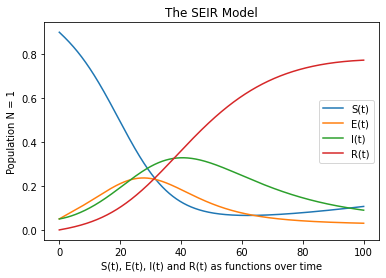

In [ ]:
#plotting the results
plt.plot(t, solution[:, 0], label="S(t)")
plt.plot(t, solution[:, 1], label="E(t)")
plt.plot(t, solution[:, 2], label="I(t)")
plt.plot(t, solution[:, 3], label="R(t)")

plt.title('The SEIR Model')
plt.xlabel("S(t), E(t), I(t) and R(t) as functions over time")
plt.ylabel("Population N = 1")
plt.legend()
plt.show()

##The SIR model with 'infectiousness' modelled as a function of t (days).


#####The following code creates a function,

$$\beta = \alpha - \frac{1}{\lambda(1 + e^{\epsilon /2 - t/ \epsilon})},$$

which models the 'learning curve' a population goes through when determining how to stop the spread of a new infectious disease.

No handles with labels found to put in legend.


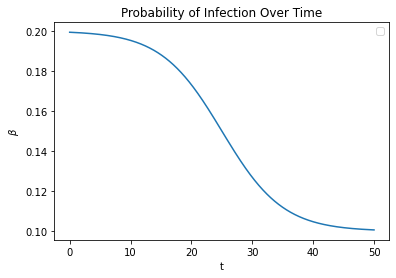

In [ ]:
#initial conditions
a_endpoint = 0.1
b_gradient = 5
c_axisshift = 5
lamb_da = 10

#defining beta
x = np.arange(0, 50, 0.01)
beta_f = a_endpoint + (1 - (1/(1 + np.exp((-x/b_gradient) + c_axisshift))))/lamb_da


plt.plot(x,beta_f)
plt.title('Probability of Infection Over Time')
plt.ylabel(r'$\beta$')
plt.xlabel('t')
plt.legend()
plt.show()

##The SIR-$\beta$ Model

#####Here we use our function, $\beta$ to see how it affects the spread of a disease.

In [ ]:
def model(y, t , gamma, alpha, epsilon, lamb_da):
  S, I, R = y

  

  dsdt = - ((alpha - 1/(lamb_da*(1 + np.exp((-t/epsilon) + (epsilon/2)))))*I*S)
  didt = (alpha - 1/(lamb_da*(1 + np.exp((-t/epsilon) + (epsilon/2)))))*I*S - gamma*I
  drdt = gamma*I

  return np.array([dsdt, didt, drdt])


In [ ]:
#initial conditions
S0 = 0.95
I0 = 0.05
R0 = 0
gamma = 0.05
alpha = 0.35
epsilon = 3
lamb_da = 4



#time (days)
t = np.linspace(0, 130, 10000)




beta = alpha - 1/(lamb_da*(1 + np.exp((-t/epsilon) + (epsilon/2))))

#implementing the sir model using beta_f
solution = scipy.integrate.odeint(model, [S0, I0, R0], t, args=(gamma, alpha, epsilon, lamb_da))
solution = np.array(solution)

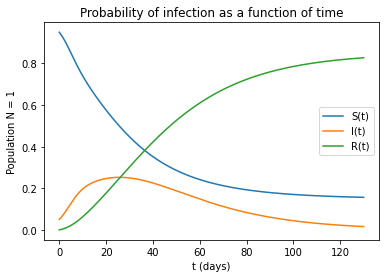

0.1566790602116741


In [ ]:
#plotting the results
plt.figure()
plt.plot(t, solution[:, 0], label="S(t)")
plt.plot(t, solution[:, 1], label="I(t)")
plt.plot(t, solution[:, 2], label="R(t)")

plt.xlabel("t (days)")
plt.ylabel("Population N = 1")
plt.title('Probability of infection as a function of time')
plt.legend()
plt.show()

print(np.min(solution[:, 0]))

##Two location network model case study

#####Here we investigate how migration and population size affect the spread of a disease.

In [ ]:
#two node model

def model(y, t , beta, gamma, mu_a, mu_B, N_a, N_b):
  S_a, I_a, R_a, S_b ,I_b ,R_b = y



  dsadt = mu_b*S_b - mu_a*S_a - (beta*I_a*S_a)/N_a 
  diadt = (beta*I_a*S_a)/N_a - gamma*I_a - mu_a*I_a + mu_b*I_b
  dradt = gamma*I_a - mu_a*R_a + mu_b*R_b

  dsbdt = mu_a*S_a - mu_b*S_b - (beta*I_b*S_b)/N_b
  dibdt = (beta*I_b*S_b)/N_b - gamma*I_b - mu_b*I_b + mu_a*I_a
  drbdt = gamma*I_b - mu_b*R_b + mu_a*R_a


  return np.array([dsadt, diadt, dradt ,dsbdt, dibdt, drbdt])

In [ ]:
#initial conditions
N_a = 55980000
N_b = 4900000

S0_a = N_a - 1
I0_a = 1
R0_a = 0

S0_b = N_b 
I0_b = 0
R0_b = 0



 

beta = 0.15
gamma = 0.05
mu_a = 0.00005598
mu_b = 0.0000049
t = np.linspace(0, 500, 10000)

solutions = scipy.integrate.odeint(model, [S0_a, I0_a, R0_a, S0_b, I0_b, R0_b], t, args=(beta, gamma, mu_a, mu_b, N_a, N_b))
solutions = np.array(solutions)

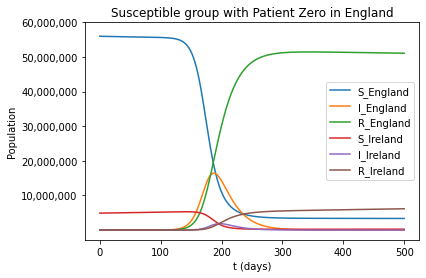

In [ ]:
#plotting the results
plt.figure()
plt.plot(t, solutions[:, 0], label="S_England")
plt.plot(t, solutions[:, 1], label="I_England")
plt.plot(t, solutions[:, 2], label="R_England")
plt.plot(t, solutions[:, 3], label="S_Ireland")
plt.plot(t, solutions[:, 4], label="I_Ireland")
plt.plot(t, solutions[:, 5], label="R_Ireland")


plt.yticks(ticks=[10000000,20000000,30000000,40000000,50000000,60000000], 
           labels=['10,000,000', '20,000,000', '30,000,000', '40,000,000', '50,000,000', '60,000,000'])
plt.title('Susceptible group with Patient Zero in England')
plt.xlabel("t (days)")
plt.ylabel("Population")
plt.legend()
plt.show()

In [ ]:
#the peak of the disease
idx_max = np.argmax(solutions[:, 1])
max_day = t[idx_max]
print(max_day)

187.31873187318732


In [ ]:
#how many people were affected
susceptible_min_e = np.min(solutions[:, 0])
susceptible_min_i = np.min(solutions[:, 3])
print('The total amount of people unaffected by this disease was {}'.format(susceptible_min_e + susceptible_min_i))
print(susceptible_min_e, susceptible_min_i)

The total amount of people unaffected by this disease was 3601328.14162793
3365369.6265855134 235958.5150424169


In [ ]:
#initial conditions
N_a = 55980000
N_b = 4900000

S0_a = N_a 
I0_a = 0
R0_a = 0

S0_b = N_b - 1
I0_b = 1
R0_b = 0



 

beta = 0.15
gamma = 0.05
mu_a = 0.00005598
mu_b = 0.0000049
t = np.linspace(0, 500, 10000)

solutions = scipy.integrate.odeint(model, [S0_a, I0_a, R0_a, S0_b, I0_b, R0_b], t, args=(beta, gamma, mu_a, mu_b, N_a, N_b))
solutions = np.array(solutions)

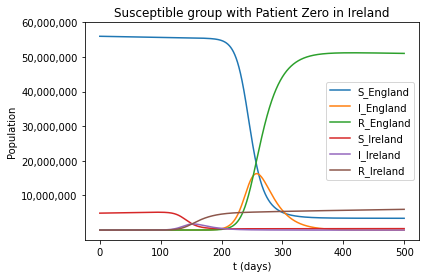

In [ ]:
#initial conditions
plt.figure()
plt.plot(t, solutions[:, 0], label="S_England")
plt.plot(t, solutions[:, 1], label="I_England")
plt.plot(t, solutions[:, 2], label="R_England")
plt.plot(t, solutions[:, 3], label="S_Ireland")
plt.plot(t, solutions[:, 4], label="I_Ireland")
plt.plot(t, solutions[:, 5], label="R_Ireland")


plt.yticks(ticks=[10000000,20000000,30000000,40000000,50000000,60000000], 
           labels=['10,000,000', '20,000,000', '30,000,000', '40,000,000', '50,000,000', '60,000,000'])
plt.title('Susceptible group with Patient Zero in Ireland')
plt.xlabel("t (days)")
plt.ylabel("Population")
plt.legend()
plt.show()

In [ ]:
#the peak of the disease
idx_max = np.argmax(solutions[:, 1])
max_day = t[idx_max]
print(max_day)

257.67576757675766


In [ ]:
#how many people were affected
susceptible_min_e = np.min(solutions[:, 0])
susceptible_min_i = np.min(solutions[:, 3])
print('The total amount of people unaffected by this disease was {}'.format(susceptible_min_e + susceptible_min_i))
print(susceptible_min_e, susceptible_min_i)

The total amount of people unaffected by this disease was 3794437.1804537806
3411266.1959794653 383170.9844743153


#Vaccination Rate over time


#####The following code was used tocreate a function that models vaccination rate as a Sigmoid Function.

No handles with labels found to put in legend.


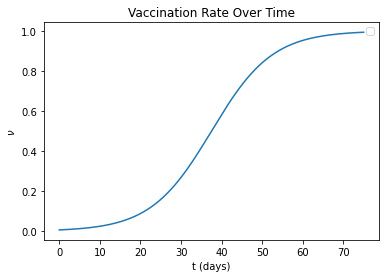

In [ ]:
#initial conditions
a_startpoint = 0
b_gradient = 7.5
c_axisshift = 5
lamb_da = 1

#defining beta
x = np.arange(0, 10*b_gradient, 0.01)
beta_f = a_startpoint + (1/(1 + np.exp((-x/b_gradient) + c_axisshift)))/lamb_da


plt.plot(x,beta_f)
plt.title('Vaccination Rate Over Time')
plt.ylabel(r'$\nu$')
plt.xlabel('t (days)')
#plt.xticks(ticks=[0, 100], labels=['0', r'$10 \times \lambda$'])
#plt.yticks(ticks=[0, 0.1], labels=[r'$\alpha$', r'$1/\lambda$'])
plt.legend()
plt.show()

#Vaccination and Asymptomatics

#####The following code was used to numerically solve the SIR model with vaccination and asymptomatics accounted for.

In [ ]:
def model(y, t, gamma, pi, iota, beta, mu, a_endpoint, b_gradient, c_axisshift, lamb_da, a_startpoint_i, b_gradient_i, c_axisshift_i, lamb_da_i):
  S, I, R = y


  dsdt = -iota*(beta*S*I) - (1-iota)*(a_endpoint + (1 - (1/(1 + np.exp((-t/b_gradient) + c_axisshift))))/lamb_da)*S*I - ((a_startpoint_i + (1/(1 + np.exp((-t/b_gradient_i) + c_axisshift_i)))/lamb_da_i) + mu)*S + (a_startpoint_v + (1/(1 + np.exp((-t/b_gradient_v) + c_axisshift_v)))/lamb_da_v)*pi

  didt = iota*(beta*S*I) + (1-iota)*(a_endpoint + (1 - (1/(1 + np.exp((-t/b_gradient) + c_axisshift))))/lamb_da)*S*I - ((a_startpoint_i + (1/(1 + np.exp((-t/b_gradient_i) + c_axisshift_i)))/lamb_da_i) + gamma + mu)*I

  drdt = ((a_startpoint_i + (1/(1 + np.exp((-t/b_gradient_i) + c_axisshift_i)))/lamb_da_i) + gamma)*I + (a_startpoint_i + (1/(1 + np.exp((-t/b_gradient_i) + c_axisshift_i)))/lamb_da_i)*pi - mu*R


  return np.array([dsdt, didt, drdt])



In [ ]:
#initial conditions
S0 = 0.95
I0 = 0.05
R0 = 0

gamma = 0.05
pi = 0.0005
iota = 0.05
beta = 0.2
mu = 0.0005


a_endpoint = 0.1
b_gradient = 5
c_axisshift = 5
lamb_da = 10


a_startpoint_i = 0
b_gradient_i = 7.5
c_axisshift_i = 5
lamb_da_i = 20


a_startpoint_v = 0
b_gradient_v = 7.5
c_axisshift_v = 5
lamb_da_v = 1



#time (days)
t = np.linspace(0, 130, 10000)




beta_f = a_endpoint + (1 - (1/(1 + np.exp((-x/b_gradient) + c_axisshift))))/lamb_da
vac_f = a_startpoint_i + (1/(1 + np.exp((-x/b_gradient_i) + c_axisshift_i)))/lamb_da_i




#implementing the sir model using beta_f
solution = scipy.integrate.odeint(model, [S0, I0, R0], t, args=(gamma, pi, iota, beta, mu, a_endpoint, b_gradient, c_axisshift, lamb_da, a_startpoint_i, b_gradient_i, c_axisshift_i, lamb_da_i))
solution = np.array(solution)

In [ ]:
model([S0, I0, R0], t, gamma, pi, iota, beta, mu, a_endpoint, b_gradient, c_axisshift, lamb_da, a_startpoint_i, b_gradient_i, c_axisshift_i, lamb_da_i)

(3, 10000)

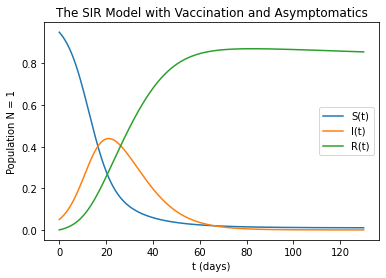

In [ ]:
#plotting the results
plt.figure()
plt.plot(t, solution[:, 0], label="S(t)")
plt.plot(t, solution[:, 1], label="I(t)")
plt.plot(t, solution[:, 2], label="R(t)")

plt.xlabel("t (days)")
plt.ylabel("Population N = 1")
plt.title('The SIR Model with Vaccination and Asymptomatics')
plt.legend()
plt.show()



In [ ]:
idx_max = np.argmax(solution[:, 1])
max_day = t[idx_max]
print('The epidemic peaked on day {} where {}% of the population was infected'.format(max_day, np.max(solution[:, 1])))


idx_end = np.where(solution[:, 1] < 0.05)[0][0]
ended = t[idx_end]
print('The epidemic ended on day ', ended)

The epidemic peaked on day 24.507450745074507 where 0.3453244039340228% of the population was infected
The epidemic ended on day  62.14621462146214


#The SIS model

#####The folloiwing code was used to numerically solve the SIS model for flu and seasonal flu by modelling $\beta$ as a $cos$ wave.

In [58]:
def model(y, t, gamma):
  S, I = y


  dsdt = -(((np.cos(t/50) + 1)/25)*I*S) + gamma*I
  didt = ((np.cos(t/50) + 1)/25)*I*S - gamma*I


  return np.array([dsdt, didt])


In [59]:
#initial conditions

S0 = 0.95
I0 = 0.05




gamma = 0.03


#time (days)
t = np.linspace(0, 730, 10000)


#the array of solutions
solution = scipy.integrate.odeint(model, [S0, I0], t, args=(gamma,))
solution = np.array(solution)


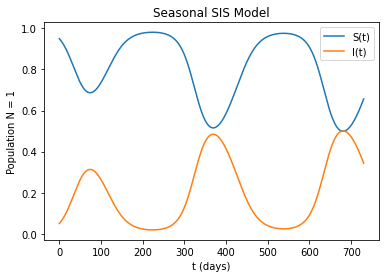

In [60]:
#plotting the results

plt.figure()
plt.plot(t, solution[:, 0], label="S(t)")
plt.plot(t, solution[:, 1], label="I(t)")


plt.xlabel("t (days)")
plt.ylabel("Population N = 1")
plt.title('Seasonal SIS Model')
plt.legend()
plt.show()

#####The following code was used in our seasonal SIS model to represent an oscilating transmission rate

<function matplotlib.pyplot.show>

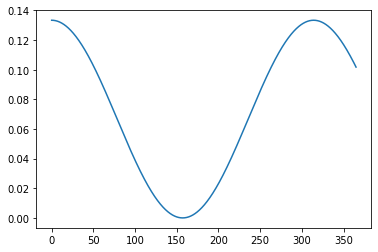

In [54]:

x = np.linspace(0, 365, 10000)

b = 50
c = 15


beta_sin = (np.cos(x/b) + 1)/c

plt.plot(x,beta_sin)
plt.show


#The SIRC model


#####The following code was used to numerically solve the SIRC model. 

In [61]:
def model(y, t , beta, gamma, mu, alpha, delta):
  S, I, R, C = y

  dsdt = gamma*(1 - S) - beta*I*S + mu*C
  didt = beta*I*S + mu*beta*C*I - (gamma + alpha)*I
  drdt = (1-mu)*beta*C*I + alpha*I - (gamma + delta)*R
  dcdt = delta*R - beta*C*I - (gamma + eta)*C


  return ([dsdt, didt,  drdt, dcdt])

In [65]:
#initial conditions
S0 = 0.95
I0 = 0.05
R0 = 0
C0 = 0

beta = 0.3
gamma = 0.005
mu = 0.05
alpha = 0.1
delta = 0.1
eta = 0.1


t = np.linspace(0, 100, 10000)

solution = scipy.integrate.odeint(model, [S0, I0, R0, C0], t, args=(beta, gamma, mu, alpha, delta))
solution = np.array(solution)

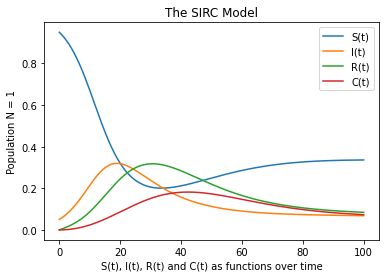

In [67]:
#plotting the results
plt.plot(t, solution[:, 0], label="S(t)")
plt.plot(t, solution[:, 1], label="I(t)")
plt.plot(t, solution[:, 2], label="R(t)")
plt.plot(t, solution[:, 3], label="C(t)")

plt.title('The SIRC Model')
plt.xlabel("S(t), I(t), R(t) and C(t) as functions over time")
plt.ylabel("Population N = 1")
plt.legend()
plt.show()